# Постановка задачи:

**Формулировка:**

Необходимо найти, как поставить стол с жёсткой конструкцией на кривой пол так, чтобы:

1. Минимизировать наклон столешницы,
2. Минимизировать отрыв четвёртой ножки от пола,

при условии, что три из них уже стоят на полу.

**Обозначения:**

* Размеры стола:

$$W - ширина, L - длина, h - высота$$

* Геометрия ножек в локальных координата относительно центра столешницы:

$$\vec{r}_{1} = (-\dfrac{L}{2}, -\dfrac{W}{2}, -h), \vec{r}_{2} = (\dfrac{L}{2}, -\dfrac{W}{2}, -h), \vec{r}_{3} = (-\dfrac{L}{2}, \dfrac{W}{2}, -h), \vec{r}_{4} = (\dfrac{L}{2}, \dfrac{W}{2}, -h)$$

*  Геометрия ножек в глобальных координатах:

$$\vec{p}_{i} = \begin{bmatrix}
x_{i}\\
y_{i}\\
z_{i}
\end{bmatrix} = R \cdot \vec{r}_{i} +  \begin{bmatrix}
x_{c}\\
y_{c}\\
z_{c}
\end{bmatrix}, i=\{1,2,3,4\}, \ x_{c},y_{c},z_{c} - координаты \ центра \ столешницы$$

$$R = R_{x}(\theta) \cdot R_{y}(\phi) =
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos (\theta) & -\sin(\theta) \\
0 & \sin(\theta) & \cos (\theta)
\end{bmatrix}
\begin{bmatrix}
\cos(\phi) & 0 & \sin(\phi)\\
0 & 1 & 0 \\
-\sin(\phi) & 0 & \cos (\phi)
\end{bmatrix}
 - матрица \ поворота$$

* Поверхность пола:

$$z = f(x,y) = 0.2 x + 0.05y \cdot \sin{(0.5 x)} + 0.1 \cos{(0.3  y)} \cdot \cos{(x y)}$$

* Расположение 3-х ножек на полу:

$$z_{i} = f(x_{i}, y_{i}), i=\{1,2,3\}$$

* Z-координата центра стола:

$$z_{c} = \dfrac{1}{3}\sum_{i=1}^{3}[f(x_{i},y_{i})-(R \cdot r_{i})_{z}]$$

**Математическая постановка задачи многокритериальной оптимизации:**

$$\min_{x_c, y_c, \theta, \phi}
\begin{bmatrix}
f_1(\theta, \phi) \\
f_2(x_c, y_c, \theta, \phi)
\end{bmatrix},$$

$$f_1(\theta, \phi) = \arccos(\vec{n}(\theta, \phi) \cdot \vec{e}_{z}) = \arccos (\cos(\theta) \cos(\phi)) - наклон \ столешницы$$

$$f_2(x_c, y_c, \theta, \phi) = \left| z_4 - f(x_4, y_4) \right| - отрыв \ четвертой \ ножки \ от \ пола$$

**Решение:**

* Оптимальное решение - фронт Парето

* Методы оптимизации - способы построить его или найти отдельные решения на нем.
 * SLSQP
 * Имитации отжига
 * MOEA/D

* Основа - поиск решениия взвешенной суммы

$$\min_{x_c, y_c, \theta, \phi}[\alpha f_1 + (1-\alpha) f_2],$$
$$\alpha \in [0,1],  x_{c}, y_{c} \in [-2,2], \theta, \phi \in [-\dfrac{\pi}{4},\dfrac{\pi}{4}]$$

* Покрытие - задание сетки и решения семейства задач

$$\alpha = \{0.05 \cdot k\}, k=0,...,20$$

* Инициализация x_{c}, y_{c}, \theta, \phi - случайным образом для каждого $\alpha$

**Псевдоалгоритм:**

    Input: Функция пола f(x, y), параметры стола (L, W, h), сетка весов alpha для скаляризации.
    
    Инициализация: Центр и углы наклона случайным образом в рамках ограничений для каждого alpha.

    Для каждой alpha ∈ [0, 1]:

    1. Задаем целевую функцию:
        F(x_c, y_c, θ, φ) = alpha * f1(θ, φ) + (1 - alpha) * f2(x_c, y_c, θ, φ)

    2. Оптимизируем F по переменным (x_c, y_c, θ, φ):
        
        2.1. Для каждого кандидата (x_c, y_c, θ, φ):
        
            a. Вычисляем матрицу поворота R(θ, φ)
            
            b. Находим координаты трех ножек:
                p_i = R * r_i + [x_c, y_c, z_c],  i = 1..3

            c. Вычисляем z_c:
                z_c = (1/3) * Σ [f(x_i, y_i) - (R * r_i)_z]  для i = 1..3

            d. Находим координаты 4-й ножки:
                p_4 = R * r_4 + [x_c, y_c, z_c]

            e. Вычисляем:
                f1 = arccos( (R * e_z) ⋅ e_z )
                f2 = |z_4 - f(x_4, y_4)|

            f. Возвращаем F = alpha * f1 + (1 - alpha) * f2

    3. Сохраняем оптимальное решение для текущей alpha

    На выходе: множество парето-оптимальных решений (f1, f2)

**Методы оптимизации:**

* SLSQP - градиентный
* Ититации отжига - стохастический эвристический
* MOEA/D - эволюционный метаэвристический алгоритм, который решает многокритериальную задачу путём разложения её на много подзадач, каждая из которых — скалярная.

Отличие:
Во взвешенной сумме + градиент или SA — решаем каждую задачу отдельно.
В MOEA/D — все задачи решаются совместно, параллельно, с обменом информацией. В нем важно вручную настроить сетку и метод декомпозиции на взвешенную сумму, чтобы результаты были сравнимы.

**Сравнение:**
* объем Парето-фронта
* Наложение Парето-фронтов
* Exploration/Exploitation

In [ ]:
# Подключение библиотек
!pip install pymoo
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, acos
from scipy.optimize import minimize
from tqdm import tqdm
import plotly.graph_objects as go
from pymoo.indicators.hv import Hypervolume
from scipy.stats import mannwhitneyu

In [ ]:
# Функция пола
def f_floor(x, y):
    return 0.2 * x + 0.05 * y * np.sin(0.5 * x) + 0.1 * np.cos(0.3 * y) * np.cos(x * y)

In [ ]:
# Объединение целевой фкункции
def objective_function(params, alpha, f_floor, L, W, h):
    x_c, y_c, theta, phi = params

    R_x = np.array([
        [1, 0, 0],
        [0, cos(theta), -sin(theta)],
        [0, sin(theta), cos(theta)]])
    R_y = np.array([
        [cos(phi), 0, sin(phi)],
        [0, 1, 0],
        [-sin(phi), 0, cos(phi)]])
    R = R_x @ R_y

    r1 = np.array([-L/2, -W/2, -h])
    r2 = np.array([ L/2, -W/2, -h])
    r3 = np.array([-L/2,  W/2, -h])
    r4 = np.array([ L/2,  W/2, -h])

    p1 = R @ r1 + np.array([x_c, y_c, 0])
    p2 = R @ r2 + np.array([x_c, y_c, 0])
    p3 = R @ r3 + np.array([x_c, y_c, 0])

    z_c = (
        f_floor(p1[0], p1[1]) - (R @ r1)[2] +
        f_floor(p2[0], p2[1]) - (R @ r2)[2] +
        f_floor(p3[0], p3[1]) - (R @ r3)[2]) / 3

    p4 = R @ r4 + np.array([x_c, y_c, z_c])
    z4_floor = f_floor(p4[0], p4[1])

    f1 = acos(cos(theta) * cos(phi))
    f2 = abs(p4[2] - z4_floor)

    return alpha * f1 + (1 - alpha) * f2, f1, f2

In [ ]:
# Проверка Парето-оптимальности
def is_pareto_efficient(points):
    n_points = points.shape[0]
    is_efficient = np.ones(n_points, dtype=bool)
    for i in range(n_points):
        for j in range(n_points):
            if all(points[j] <= points[i]) and any(points[j] < points[i]):
                is_efficient[i] = False
                break
    return is_efficient

In [ ]:
# Функция для визуализации
def visualize_single_solution(individual, f_val, title=""):
    xc, yc, theta, phi = individual

    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]])
    R_y = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]])

    R = R_x @ R_y

    r1 = np.array([-L/2, -W/2, -h])
    r2 = np.array([ L/2, -W/2, -h])
    r3 = np.array([-L/2,  W/2, -h])
    r4 = np.array([ L/2,  W/2, -h])

    local_legs = [r1, r2, r3, r4]
    rotated_legs = [R @ r for r in local_legs]

    center_xy = np.array([xc, yc])
    positions_xy = [leg[:2] + center_xy for leg in rotated_legs[:3]]
    floor_heights = [f_floor(x, y) for x, y in positions_xy]

    zc = np.mean([floor_z - leg[2] for floor_z, leg in zip(floor_heights, rotated_legs[:3])])
    global_legs = [leg + np.array([xc, yc, zc]) for leg in rotated_legs]

    table_corners_local = [
        np.array([-L/2, -W/2, 0]),
        np.array([L/2, -W/2, 0]),
        np.array([-L/2, W/2, 0]),
        np.array([L/2, W/2, 0])
    ]
    table_corners_global = [R @ pt + np.array([xc, yc, zc]) for pt in table_corners_local]
    x_table, y_table, z_table = zip(*table_corners_global)

    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, y)
    Z = f_floor(X, Y)

    fig = go.Figure()

    fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', opacity=0.6, showscale=False))

    fig.add_trace(go.Mesh3d(
        x=x_table,
        y=y_table,
        z=z_table,
        i=[0, 0],
        j=[1, 3],
        k=[3, 2],
        color='saddlebrown',
        opacity=0.9,
        name='Столешница',
        flatshading=True
    ))

    normal = R @ np.array([0, 0, 1])
    top_points = [pt + h * normal for pt in global_legs]

    for bottom, top in zip(global_legs, top_points):
        fig.add_trace(go.Scatter3d(
            x=[bottom[0], top[0]],
            y=[bottom[1], top[1]],
            z=[bottom[2], top[2]],
            mode='lines',
            line=dict(color='black', width=4),
            showlegend=False
        ))

    fig.update_layout(
        title=title or f"Визуализация решения\nНаклон: {f_val[0]:.3f}°, Отрыв: {f_val[1]:.3f}",
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        )
    )

    print("\nПараметры решения")
    print(f"Наклон столешницы (f1): {f_val[0]:.3f}°")
    print(f"Отрыв четвёртой ножки (f2): {f_val[1]:.3f}")
    print(f"Координаты центра: xc={xc:.3f}, yc={yc:.3f}, θ={theta:.3f}, φ={phi:.3f}")
    print(f"Длина ножек (h): {h}")

    print("\nКоординаты углов столешницы:")
    for i, pt in enumerate(table_corners_global):
        print(f"  Угол {i}: x={pt[0]:.3f}, y={pt[1]:.3f}, z={pt[2]:.3f}")

    print("\nКоординаты нижних точек ножек (на полу):")
    for i, pt in enumerate(global_legs):
        print(f"  Ножка {i+1}: x={pt[0]:.3f}, y={pt[1]:.3f}, z={pt[2]:.3f}")

    print("\nКоординаты верхних точек ножек (соединение со столешницей):")
    for i, pt in enumerate(top_points):
        print(f"  Ножка {i+1}: x={pt[0]:.3f}, y={pt[1]:.3f}, z={pt[2]:.3f}")

    fig.show()

In [ ]:
# Инициализация параметров задачи
random.seed(31)
L, W, h = 1.0, 0.5, 0.7
num_starts = 1500
alphas = np.linspace(0, 1, num_starts)
bounds = np.array([[-2, 2], [-2, 2], [-np.pi/4, np.pi/4], [-np.pi/4, np.pi/4]])
methods = ['SLSQP', 'SA', 'MOEA/D']
results = {m: [] for m in methods}
solutions = {m: [] for m in methods}
params = {m: [] for m in methods}
pareto_results = {m: [] for m in methods}
initial_guesses = [
    [np.random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
    for _ in range(num_starts)]

# SLSQP

SLSQP - градиентный метод численной оптимизации, основанный на последовательном решении задач квадратичного программирования (QP). Метод итеративно решает вспомогательные квадратичные подзадачи, аппроксимируя исходную задачу в окрестности текущей точки.

 Он особенно хорошо подходит для задач, где важны точные локальные решения и где есть гладкие ограничения - уравнения и неравенства.

In [ ]:
method = 'SLSQP'
solutions[method] = []

print(f"Оптимизация методом {method}")
for i, alpha in enumerate(tqdm(alphas, desc=f"Оптимизация по alpha ({method})")):
      initial_guess = initial_guesses[i]

      def scalar_objective(params):
          val, _, _ = objective_function(params, alpha, f_floor, L, W, h)
          return val

      res = minimize(
              scalar_objective,
              initial_guess,
              method='SLSQP',
              bounds=bounds,
              options={'disp': False, 'maxiter': 1000})

      if not res.success:
          print(f"alpha={alpha:.3f}, старт № {_+1}: Метод {method} не сошелся")
          continue

      _, f1, f2 = objective_function(res.x, alpha, f_floor, L, W, h)
      f1_deg = np.degrees(f1)
      f2_cm = f2*100
      results[method].append((f1_deg, f2_cm))
      solutions[method].append((f1_deg, f2_cm, res.x))


Оптимизация методом SLSQP


Оптимизация по alpha (SLSQP): 100%|██████████| 1500/1500 [00:49<00:00, 30.52it/s]


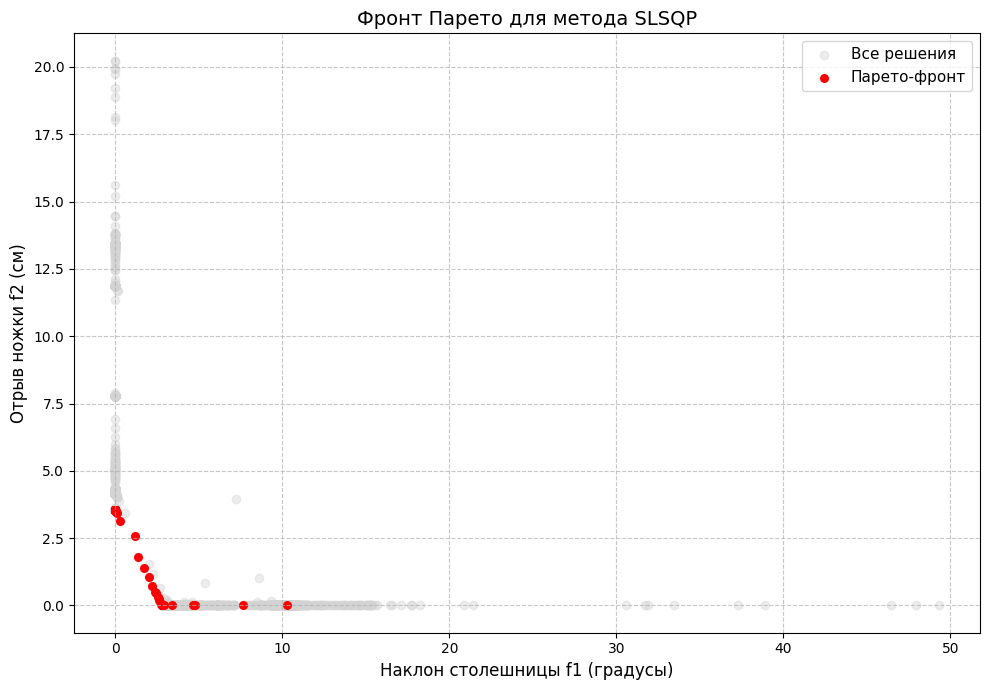

In [ ]:
points = np.array(results[method])
pareto_mask = is_pareto_efficient(points)
pareto_points = points[pareto_mask]
pareto_points = pareto_points[np.argsort(pareto_points[:, 0])]
pareto_results[method].append(pareto_points)

plt.figure(figsize=(10, 7))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', alpha=0.4, label='Все решения')
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], c='red', s=30, label='Парето-фронт')

plt.xlabel("Наклон столешницы f1 (градусы)", fontsize=12)
plt.ylabel("Отрыв ножки f2 (см)", fontsize=12)
plt.title(f"Фронт Парето для метода {method}", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
solutions_array = np.array(solutions[method], dtype=object)
points = np.array([[item[0], item[1]] for item in solutions_array])

pareto_mask = is_pareto_efficient(points)
pareto_points = points[pareto_mask]
pareto_params = solutions_array[pareto_mask]

sort_idx_f1 = np.argsort(pareto_points[:, 0])
pareto_points_f1_sorted = pareto_points[sort_idx_f1]
pareto_params_f1_sorted = pareto_params[sort_idx_f1]

idx_min_f1 = 0
f1_deg_min, f2_cm_min = pareto_points_f1_sorted[idx_min_f1]
params_min_f1 = pareto_params_f1_sorted[idx_min_f1][2]
f_val_min_f1 = (np.radians(f1_deg_min), f2_cm_min / 100)

visualize_single_solution(params_min_f1, f_val_min_f1, title=f"{method}: Минимальный наклон столешницы")


sort_idx_f2 = np.argsort(pareto_points[:, 1])
pareto_points_f2_sorted = pareto_points[sort_idx_f2]
pareto_params_f2_sorted = pareto_params[sort_idx_f2]

idx_min_f2 = 0
f1_deg_min_f2, f2_cm_min_f2 = pareto_points_f2_sorted[idx_min_f2]
params_min_f2 = pareto_params_f2_sorted[idx_min_f2][2]
f_val_min_f2 = (np.radians(f1_deg_min_f2), f2_cm_min_f2 / 100)

visualize_single_solution(params_min_f2, f_val_min_f2, title=f"{method}: Минимальный отрыв ножки")


Параметры решения
Наклон столешницы (f1): 0.000°
Отрыв четвёртой ножки (f2): 0.035
Координаты центра: xc=0.925, yc=-2.000, θ=-0.000, φ=-0.000
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=0.425, y=-2.250, z=0.823
  Угол 1: x=1.425, y=-2.250, z=0.823
  Угол 2: x=0.425, y=-1.750, z=0.823
  Угол 3: x=1.425, y=-1.750, z=0.823

Координаты нижних точек ножек (на полу):
  Ножка 1: x=0.425, y=-2.250, z=0.123
  Ножка 2: x=1.425, y=-2.250, z=0.123
  Ножка 3: x=0.425, y=-1.750, z=0.123
  Ножка 4: x=1.425, y=-1.750, z=0.123

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=0.425, y=-2.250, z=0.823
  Ножка 2: x=1.425, y=-2.250, z=0.823
  Ножка 3: x=0.425, y=-1.750, z=0.823
  Ножка 4: x=1.425, y=-1.750, z=0.823



Параметры решения
Наклон столешницы (f1): 0.180°
Отрыв четвёртой ножки (f2): 0.000
Координаты центра: xc=0.168, yc=-0.679, θ=0.077, φ=-0.162
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=-0.325, y=-0.922, z=0.732
  Угол 1: x=0.662, y=-0.934, z=0.893
  Угол 2: x=-0.325, y=-0.423, z=0.770
  Угол 3: x=0.662, y=-0.436, z=0.931

Координаты нижних точек ножек (на полу):
  Ножка 1: x=-0.212, y=-0.868, z=0.043
  Ножка 2: x=0.775, y=-0.881, z=0.204
  Ножка 3: x=-0.212, y=-0.370, z=0.082
  Ножка 4: x=0.775, y=-0.382, z=0.243

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=-0.325, y=-0.922, z=0.732
  Ножка 2: x=0.662, y=-0.934, z=0.893
  Ножка 3: x=-0.325, y=-0.423, z=0.770
  Ножка 4: x=0.662, y=-0.436, z=0.931


# Имитация отжига

Метод имитации отжига — это стохастический алгоритм глобальной оптимизации, вдохновленный процессом физического отжига металлов. В природе при медленном охлаждении металла атомы упорядочиваются в минимально энергетичное состояние. Аналогично, используя этот алгоритм, мы пытаемся найти глобальный минимум функции, постепенно снижая «температуру» и уменьшая вероятность принятия худших решений.

Данный метод подходит для ситуаций, когда функция не гладкая или шумная, а также если есть много локальных минимумов.

In [ ]:
def sa(f, bounds,initial_solution, max_iter=100, temp=1000, cooling_rate=0.99):
    best_energy = float('inf')
    best_solution = None

    current_solution = initial_solution
    current_energy, _, _ = f(current_solution)

    for i in range(max_iter):
        new_solution = current_solution + np.random.uniform(-0.1, 0.1, size=len(bounds))
        new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])

        new_energy, _, _ = f(new_solution)

        if new_energy < current_energy or np.random.rand() < np.exp(-(new_energy - current_energy) / temp):
            current_solution = new_solution
            current_energy = new_energy

            if new_energy < best_energy:
                best_solution = new_solution
                best_energy = new_energy

        temp *= cooling_rate

    return best_solution, best_energy

method = 'SA'
solutions[method] = []
print(f"Оптимизация методом {method}")
for i, alpha in enumerate(tqdm(alphas, desc=f"Оптимизация по alpha ({method})")):
        initial_guess = initial_guesses[i]
        # Обертка для передачи alpha в целевую функцию
        def wrapped_obj(params):
            return objective_function(params, alpha, f_floor, L, W, h)

        best_solution, _ = sa(
            wrapped_obj,
            bounds,
            initial_guess,
            max_iter=300,
            temp=1000,
            cooling_rate=0.99)

        _, f1, f2 = objective_function(best_solution, alpha, f_floor, L, W, h)
        f1_deg = np.degrees(f1)
        f2_cm = f2*100
        results[method].append((f1_deg, f2_cm))
        solutions[method].append((f1_deg, f2_cm, best_solution))

Оптимизация методом SA


Оптимизация по alpha (SA): 100%|██████████| 1500/1500 [00:57<00:00, 25.99it/s]


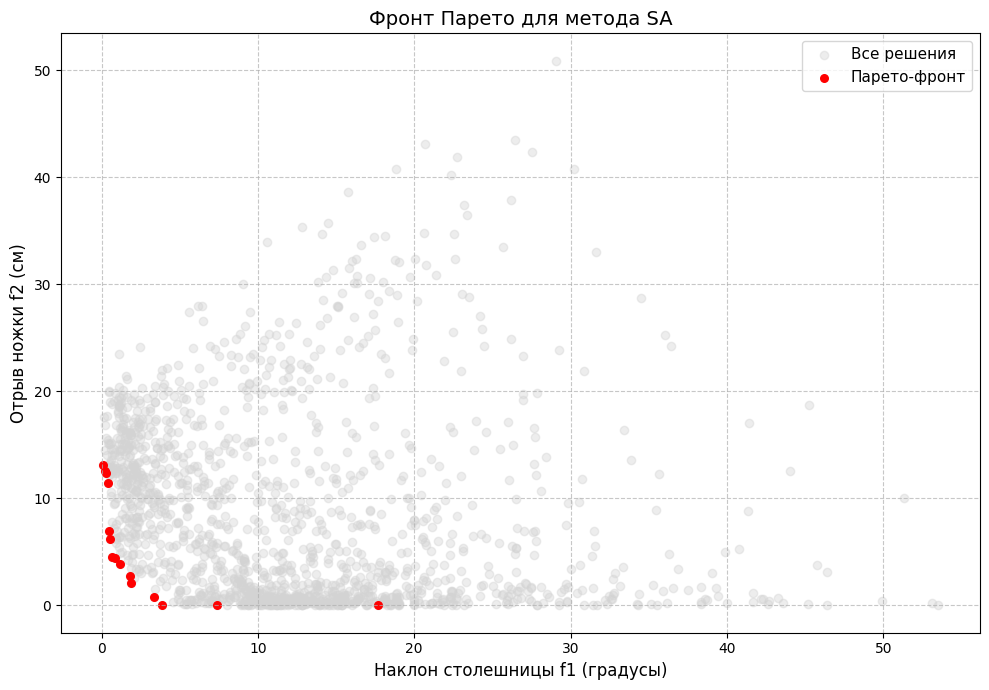

In [ ]:
points = np.array(results[method])
pareto_mask = is_pareto_efficient(points)
pareto_points = points[pareto_mask]
pareto_points = pareto_points[np.argsort(pareto_points[:, 0])]
pareto_results[method].append(pareto_points)

plt.figure(figsize=(10, 7))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', alpha=0.4, label='Все решения')
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], c='red', s=30, label='Парето-фронт')

plt.xlabel("Наклон столешницы f1 (градусы)", fontsize=12)
plt.ylabel("Отрыв ножки f2 (см)", fontsize=12)
plt.title(f"Фронт Парето для метода {method}", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
solutions_array = np.array(solutions[method], dtype=object)
points = np.array([[item[0], item[1]] for item in solutions_array])

pareto_mask = is_pareto_efficient(points)
pareto_points = points[pareto_mask]
pareto_params = solutions_array[pareto_mask]

sort_idx_f1 = np.argsort(pareto_points[:, 0])
pareto_points_f1_sorted = pareto_points[sort_idx_f1]
pareto_params_f1_sorted = pareto_params[sort_idx_f1]

idx_min_f1 = 0
f1_deg_min, f2_cm_min = pareto_points_f1_sorted[idx_min_f1]
params_min_f1 = pareto_params_f1_sorted[idx_min_f1][2]
f_val_min_f1 = (np.radians(f1_deg_min), f2_cm_min / 100)

visualize_single_solution(params_min_f1, f_val_min_f1, title=f"{method}: Минимальный наклон столешницы")


sort_idx_f2 = np.argsort(pareto_points[:, 1])
pareto_points_f2_sorted = pareto_points[sort_idx_f2]
pareto_params_f2_sorted = pareto_params[sort_idx_f2]

idx_min_f2 = 0
f1_deg_min_f2, f2_cm_min_f2 = pareto_points_f2_sorted[idx_min_f2]
params_min_f2 = pareto_params_f2_sorted[idx_min_f2][2]
f_val_min_f2 = (np.radians(f1_deg_min_f2), f2_cm_min_f2 / 100)

visualize_single_solution(params_min_f2, f_val_min_f2, title=f"{method}: Минимальный отрыв ножки")


Параметры решения
Наклон столешницы (f1): 0.001°
Отрыв четвёртой ножки (f2): 0.132
Координаты центра: xc=0.200, yc=-0.829, θ=-0.001, φ=0.001
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=-0.300, y=-1.079, z=0.790
  Угол 1: x=0.700, y=-1.079, z=0.789
  Угол 2: x=-0.300, y=-0.579, z=0.790
  Угол 3: x=0.700, y=-0.579, z=0.789

Координаты нижних точек ножек (на полу):
  Ножка 1: x=-0.301, y=-1.079, z=0.090
  Ножка 2: x=0.699, y=-1.079, z=0.089
  Ножка 3: x=-0.301, y=-0.579, z=0.090
  Ножка 4: x=0.699, y=-0.579, z=0.089

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=-0.300, y=-1.079, z=0.790
  Ножка 2: x=0.700, y=-1.079, z=0.789
  Ножка 3: x=-0.300, y=-0.579, z=0.790
  Ножка 4: x=0.700, y=-0.579, z=0.789



Параметры решения
Наклон столешницы (f1): 0.308°
Отрыв четвёртой ножки (f2): 0.000
Координаты центра: xc=-0.690, yc=1.779, θ=0.048, φ=-0.304
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=-1.167, y=1.537, z=0.424
  Угол 1: x=-0.213, y=1.522, z=0.724
  Угол 2: x=-1.167, y=2.036, z=0.448
  Угол 3: x=-0.213, y=2.022, z=0.748

Координаты нижних точек ножек (на полу):
  Ножка 1: x=-0.958, y=1.569, z=-0.243
  Ножка 2: x=-0.004, y=1.554, z=0.057
  Ножка 3: x=-0.958, y=2.068, z=-0.219
  Ножка 4: x=-0.004, y=2.054, z=0.081

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=-1.167, y=1.537, z=0.424
  Ножка 2: x=-0.213, y=1.522, z=0.724
  Ножка 3: x=-1.167, y=2.036, z=0.448
  Ножка 4: x=-0.213, y=2.022, z=0.748


# MOEA/D

MOEA/D (Multi-Objective Evolutionary Algorithm based on Decomposition) - эволюционный алгоритм многокритериальной оптимизации, основанный на декомпозиции. Метод решает задачи с несколькими целевыми переменными, раскладывая многокритериальную оптимизацию на множество простых подзадач. Каждая подзадача решается одновременно в рамках одной популяции, что позволяет эффективно искать решения, приближённые к Парето-оптимуму.

Данный метод подходит для случаев, когда необходимо решать задачи с несколькими целевыми показателями

In [ ]:
def moead_objective_function(f_floor, L, W, h,
                             initial_population,
                             max_generations=230,
                             pop_size=num_starts,
                             neighbor_size=5):

    weights = np.array([[i / (pop_size - 1), 1 - i / (pop_size - 1)] for i in range(pop_size)])

    neighbors = []
    for i in range(pop_size):
        distances = np.sum((weights - weights[i]) ** 2, axis=1)
        neighbors.append(np.argsort(distances)[1:neighbor_size + 1])

    population = initial_population.copy()

    # Вычисление начальных значений функции
    objectives = np.zeros((pop_size, 2))
    for i in range(pop_size):
        _, f1, f2 = objective_function(population[i], weights[i][0], f_floor, L, W, h)
        objectives[i] = [f1, f2]

    for gen in range(max_generations):
        for i in range(pop_size):
            idx1, idx2 = np.random.choice(neighbors[i], 2, replace=False)
            parent1, parent2 = population[idx1], population[idx2]

            child = 0.5 * (parent1 + parent2) + np.random.normal(0, 0.05, size=4)
            child = np.clip(child, [-2, -2, -np.pi/4, -np.pi/4], [2, 2, np.pi/4, np.pi/4])

            _, f1_child, f2_child = objective_function(child, weights[i][0], f_floor, L, W, h)

            max_replacements = 2
            replacements = 0
            for j in neighbors[i]:
                scalar_current = weights[j, 0] * objectives[j, 0] + weights[j, 1] * objectives[j, 1]
                scalar_child = weights[j, 0] * f1_child + weights[j, 1] * f2_child

                if scalar_child < scalar_current and replacements < max_replacements:
                    population[j] = child
                    objectives[j] = [f1_child, f2_child]
                    replacements += 1

    return population, objectives

method = 'MOEA/D'

population, objectives = moead_objective_function(
    f_floor=f_floor,
    L=L, W=W, h=h,
    initial_population=np.array(initial_guesses))

solutions[method] = [
    (np.degrees(f1), f2 * 100, individual)
    for (f1, f2), individual in zip(objectives, population)
]

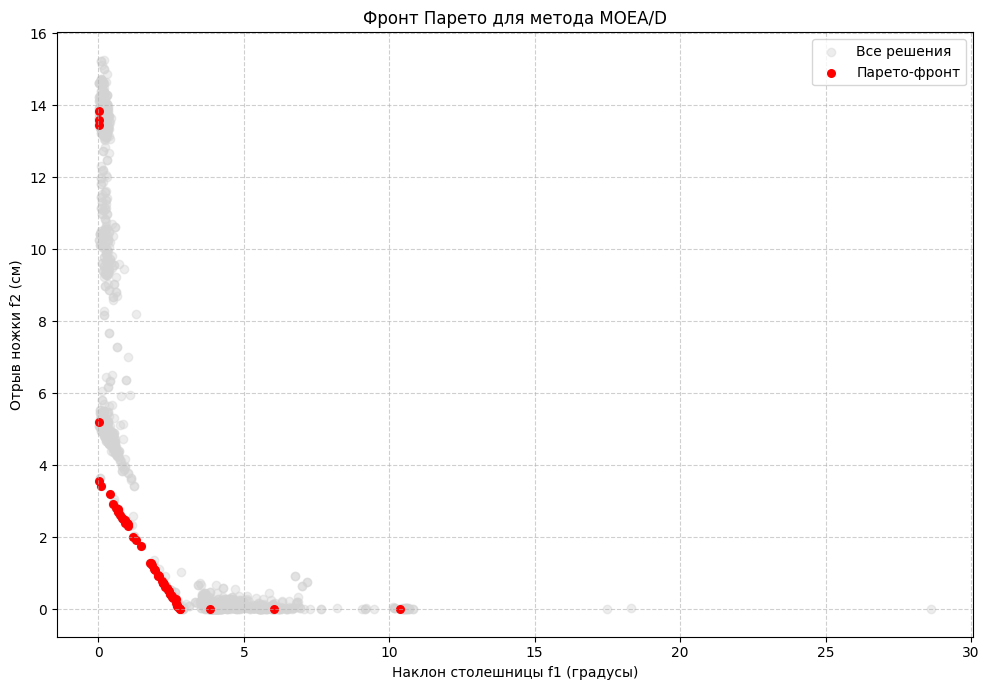

In [ ]:
solutions_array = np.array(solutions[method], dtype=object)
points = np.array([[item[0], item[1]] for item in solutions_array])

pareto_mask = is_pareto_efficient(points)
pareto_points = points[pareto_mask]
pareto_solutions = solutions_array[pareto_mask]

_, unique_idx = np.unique(pareto_points, axis=0, return_index=True)
pareto_points = pareto_points[unique_idx]
pareto_solutions = pareto_solutions[unique_idx]

plt.figure(figsize=(10, 7))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', alpha=0.4, label='Все решения')
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], c='red', s=30, label='Парето-фронт')
plt.xlabel("Наклон столешницы f1 (градусы)")
plt.ylabel("Отрыв ножки f2 (см)")
plt.title(f"Фронт Парето для метода {method}")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
sort_idx_f1 = np.argsort(pareto_points[:, 0])
min_f1_point = pareto_points[sort_idx_f1[0]]
min_f1_params = pareto_solutions[sort_idx_f1[0]][2]
f_val_min_f1 = (np.radians(min_f1_point[0]), min_f1_point[1] / 100)
visualize_single_solution(min_f1_params, f_val_min_f1, title=f"{method}: Минимальный наклон столешницы")

sort_idx_f2 = np.argsort(pareto_points[:, 1])
min_f2_point = pareto_points[sort_idx_f2[0]]
min_f2_params = pareto_solutions[sort_idx_f2[0]][2]
f_val_min_f2 = (np.radians(min_f2_point[0]), min_f2_point[1] / 100)
visualize_single_solution(min_f2_params, f_val_min_f2, title=f"{method}: Минимальный отрыв ножки")


Параметры решения
Наклон столешницы (f1): 0.000°
Отрыв четвёртой ножки (f2): 0.138
Координаты центра: xc=0.196, yc=-0.078, θ=0.000, φ=0.000
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=-0.304, y=-0.328, z=0.803
  Угол 1: x=0.696, y=-0.328, z=0.803
  Угол 2: x=-0.304, y=0.172, z=0.803
  Угол 3: x=0.696, y=0.172, z=0.803

Координаты нижних точек ножек (на полу):
  Ножка 1: x=-0.304, y=-0.328, z=0.103
  Ножка 2: x=0.696, y=-0.328, z=0.103
  Ножка 3: x=-0.304, y=0.172, z=0.103
  Ножка 4: x=0.696, y=0.172, z=0.103

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=-0.304, y=-0.328, z=0.803
  Ножка 2: x=0.696, y=-0.328, z=0.803
  Ножка 3: x=-0.304, y=0.172, z=0.803
  Ножка 4: x=0.696, y=0.172, z=0.803



Параметры решения
Наклон столешницы (f1): 0.181°
Отрыв четвёртой ножки (f2): 0.000
Координаты центра: xc=0.346, yc=-0.726, θ=0.083, φ=-0.161
Длина ножек (h): 0.7

Координаты углов столешницы:
  Угол 0: x=-0.148, y=-0.969, z=0.759
  Угол 1: x=0.839, y=-0.982, z=0.919
  Угол 2: x=-0.148, y=-0.471, z=0.801
  Угол 3: x=0.839, y=-0.484, z=0.960

Координаты нижних точек ножек (на полу):
  Ножка 1: x=-0.036, y=-0.911, z=0.071
  Ножка 2: x=0.951, y=-0.925, z=0.230
  Ножка 3: x=-0.036, y=-0.413, z=0.112
  Ножка 4: x=0.951, y=-0.426, z=0.272

Координаты верхних точек ножек (соединение со столешницей):
  Ножка 1: x=-0.148, y=-0.969, z=0.759
  Ножка 2: x=0.839, y=-0.982, z=0.919
  Ножка 3: x=-0.148, y=-0.471, z=0.801
  Ножка 4: x=0.839, y=-0.484, z=0.960


# Сравнение методов

In [ ]:
for m in methods:
    arr = np.array(pareto_results[m])
    print(f"{m}: shape = {arr.shape}")


SLSQP: shape = (1, 65, 2)
SA: shape = (1, 16, 2)
MOEA/D: shape = (1, 129, 2)


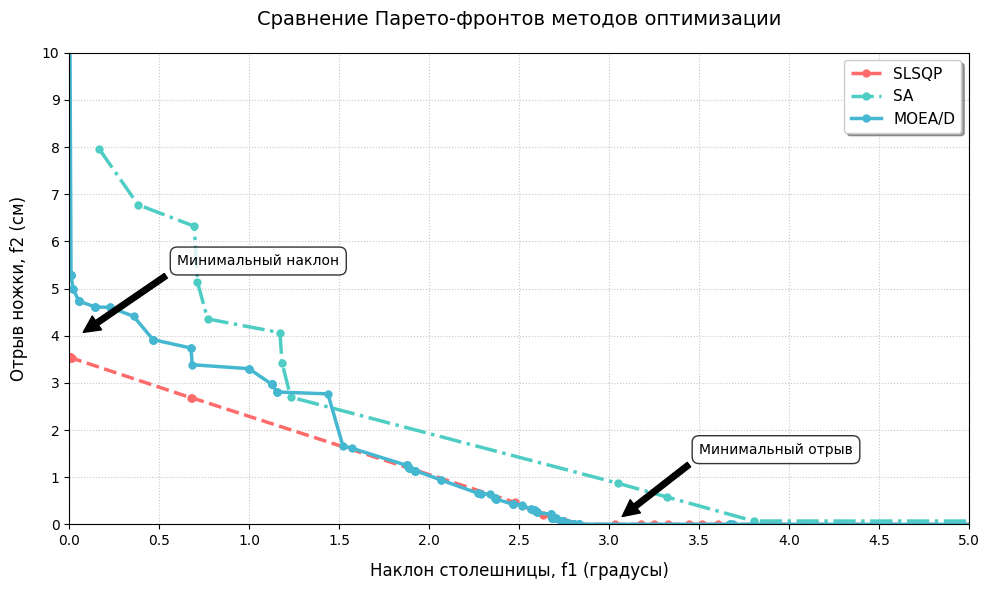

In [ ]:
# Настройка стиля
plt.figure(figsize=(10, 6))

# Цвета и стили для методов
colors = {'SLSQP': '#FF6B6B', 'SA': '#4ECDC4', 'MOEA/D': '#45B7D1'}
line_styles = {'SLSQP': '--', 'SA': '-.', 'MOEA/D': '-'}

for method in methods:
    pareto_points = pareto_results[method][0]
    plt.plot(pareto_points[:, 0], pareto_points[:, 1],
             color=colors[method],
             linestyle=line_styles[method],
             linewidth=2.5,
             label=f'{method}',
             marker='o', markersize=5)

# Настройка осей и сетки
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.yticks(np.arange(0, 11, 1))
plt.grid(True, linestyle=':', alpha=0.7)

# Подписи
plt.xlabel("Наклон столешницы, f1 (градусы)", fontsize=12, labelpad=10)
plt.ylabel("Отрыв ножки, f2 (см)", fontsize=12, labelpad=10)
plt.title("Сравнение Парето-фронтов методов оптимизации", fontsize=14, pad=20)

# Легенда
plt.legend(fontsize=11, framealpha=1, shadow=True)

# Аннотация для минимальных значений
plt.annotate('Минимальный наклон', xy=(0.05, 4), xytext=(0.6, 5.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.annotate('Минимальный отрыв', xy=(3.05, 0.1), xytext=(3.5, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# Референсная точка (максимальные значения f1 и f2 + запас)
ref_point = np.array([6, 12])

# Вычисление HV для каждого метода
hv_results = {}
for method in methods:
    pareto_points = pareto_results[method][0]
    # Нормализуем точки (чтобы минимизация работала корректно)
    points = pareto_points.copy()
    points[:, 1] = -points[:, 1]
    indicator = Hypervolume(ref_point=ref_point)
    hv = indicator.do(points)
    hv_results[method] = hv

print("Гиперобъем (HV):")
for method, hv in hv_results.items():
    print(f"{method}: {hv:.4f}")

Гиперобъем (HV):
SLSQP: 93.2662
SA: 116.3689
MOEA/D: 138.3075


In [ ]:
def coverage_metric(front_a, front_b):
    count = 0
    for b in front_b:
        if np.any(np.all(front_a <= b, axis=1)) & np.any(np.any(front_a < b, axis=1)):
            count += 1
    return count / len(front_b)

print("\nПопарное покрытие (C-метрика):")
for m1 in methods:
    for m2 in methods:
        if m1 != m2:
            c = coverage_metric(pareto_results[m1][0], pareto_results[m2][0])
            print(f"{m1} → {m2}: {c:.2f}")


Попарное покрытие (C-метрика):
SLSQP → SA: 1.00
SLSQP → MOEA/D: 0.48
SA → SLSQP: 0.00
SA → MOEA/D: 0.01
MOEA/D → SLSQP: 0.03
MOEA/D → SA: 0.94


In [ ]:
def spacing_metric(front):
    n = len(front)
    diffs = []
    for i in range(n):
        min_dist = np.min([np.linalg.norm(front[i] - front[j]) for j in range(n) if j != i])
        diffs.append(min_dist)
    return np.std(diffs)

print("\nРавномерность распределения (Spacing):")
for method in methods:
    s = spacing_metric(pareto_results[method][0])
    print(f"{method}: {s:.4f}")


Равномерность распределения (Spacing):
SLSQP: 0.3132
SA: 0.2616
MOEA/D: 0.3888


In [ ]:
# Сравнение распределений f1 (наклон столешницы)
print("Сравнение распределений f1 (наклон столешницы):")
for i in range(len(methods)):
    for j in range(i+1, len(methods)):
        m1, m2 = methods[i], methods[j]
        data1 = pareto_results[m1][0][:, 0]
        data2 = pareto_results[m2][0][:, 0]

        # Двусторонний тест
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
        print(f"{m1} vs {m2}: U={stat:.1f}, p={p:.4f}", end=' ')
        if p < 0.05:
            print("(значимое различие)")
        else:
            print("(нет значимого различия)")

# Сравнение распределений f2 (отрыв ножки)
print("\nСравнение распределений f2 (отрыв ножки):")
for i in range(len(methods)):
    for j in range(i+1, len(methods)):
        m1, m2 = methods[i], methods[j]
        data1 = pareto_results[m1][0][:, 1]
        data2 = pareto_results[m2][0][:, 1]

        # Двусторонний тест
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
        print(f"{m1} vs {m2}: U={stat:.1f}, p={p:.4f}", end=' ')
        if p < 0.05:
            print("(значимое различие)")
        else:
            print("(нет значимого различия)")

Сравнение распределений f1 (наклон столешницы):
SLSQP vs SA: U=172.0, p=0.0000 (значимое различие)
SLSQP vs MOEA/D: U=2269.0, p=0.0000 (значимое различие)
SA vs MOEA/D: U=1283.0, p=0.1138 (нет значимого различия)

Сравнение распределений f2 (отрыв ножки):
SLSQP vs SA: U=474.0, p=0.5894 (нет значимого различия)
SLSQP vs MOEA/D: U=4658.0, p=0.2077 (нет значимого различия)
SA vs MOEA/D: U=1122.0, p=0.5721 (нет значимого различия)


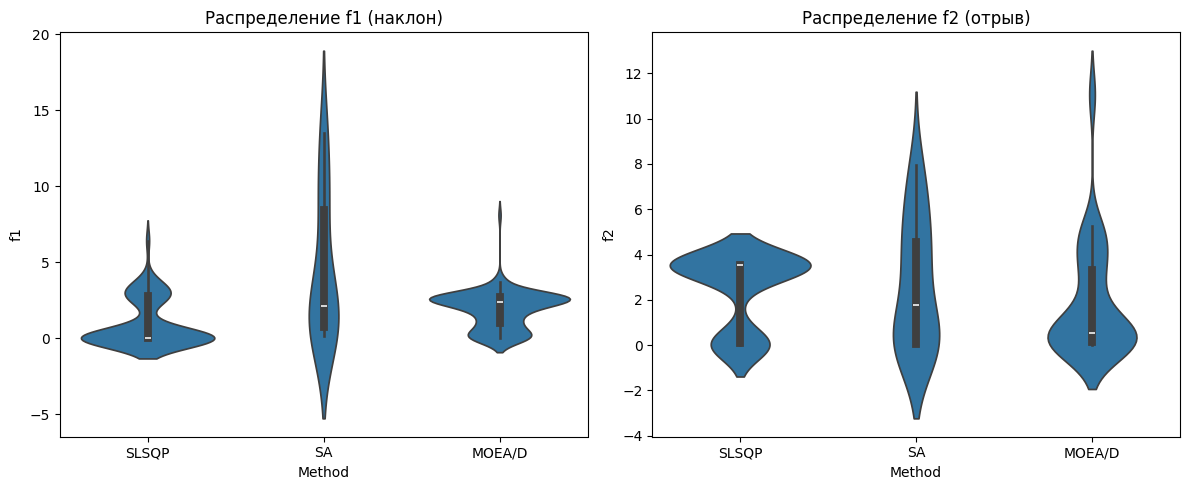

In [ ]:
import seaborn as sns
import pandas as pd

data = []
for method in methods:
    pf = pareto_results[method][0]
    for point in pf:
        data.append({'Method': method, 'f1': point[0], 'f2': point[1]})
df = pd.DataFrame(data)

# Графики распределений
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Method', y='f1', data=df)
plt.title('Распределение f1 (наклон)')
plt.subplot(1, 2, 2)
sns.violinplot(x='Method', y='f2', data=df)
plt.title('Распределение f2 (отрыв)')
plt.tight_layout()
plt.show()

В данной работе было проведено исследование многокритериальной задачи оптимизации стола на неровной поверхности. Были исследованы 3 метода: градиентный SLSQP, эвристический случайный метод имитации отжига и генетический MOEA/D. Для каждого метода был построен парето-фронт. Сравнение парето-фронтов всех алгоритмов показало, что наиболее точно сходится градиентный алгоритм. При этом генетический алгоритм показал большую плотность в области лучших решений, а эврестический случайный провел более полное исследование всех решений. Были вычислены метрики:

1. Гиперобъем: наибольшее значение показал алгоритм MOEA/D, что говорит о лучшем покрытии фронта
2. C-метрика: здесь MOEA/D снова показал наилушчие результаты, что снова подтверждает наилучшее покрытие фронта
3. Spacing: эта метрика показывает, что хоть и алгоритм имитации отжига показал плохие результаты при посике оптимума, он более равномерно распределил парето-фронт
4. Статистический тест Манна-Уитни: данный тест показывает, что парето-фронты имеют значительные различия по каким-либо параметрам
5. Визуализация показала, что градиентный и генетический методы находили локальные минимумы и большинство решений сходилось именно в них, при этом эвстристический случайный метод распределен по всем возможным решениям, что может помочь находить более сложные глобальные минимумы в других задачах.


Тем самым выбор метода зависит от цели задачи: если необходимо быстро найти минммум, то стоит использовать градиентный метод. Если необходимо однозначно найти глобальный минимум, то можно использовать генетический метод. А если задача исследовать все возможные решения, то можно рассмотреть эвстрестический случайный алгоритм.